# Sumaríssims en femení

Anàlisi de dades per a [Innovation and Human Rights](https://ihr.world/ca/projecte-sumarissims).

La preparació de les dades es pot veure [en aquest notebook](https://github.com/martinvirtel/sumarissims-dades/blob/master/work/preparaci%C3%B3%20de%20dades.ipynb).

La base de dades de la llista de reparació jurídica de víctimes del franquisme inclou dades des de 1937.



In [133]:
import pandas as pd
import altair as alt


dades = pd.read_msgpack("data/processat.msg")

dades.query("genere != '--'")[:5]

,codi,cognoms_nom,cognoms,nom,genere,edat,mun_naix,ped_naix,com_naix,prov_naix,...,pena,indult,afusellades,ref_arxiu,descr,correccio,pena_cat,cat_naix,cat_res,af_cat
17,135218,"ABAD ALFONSO, Erundina",ABAD ALFONSO,Erundina,Dona,43.0,Alcoi,--,Alcoià,Alacant,...,Sobreseïment,NaN,NaN,37729.0,ANC 2017 07 12,NaN,07 sob,e,b,no exec
18,25335,"ABAD ARBÓS, Ricardo",ABAD ARBÓS,Ricardo,Home,30.0,Barcelona,--,Barcelonès,Barcelona,...,Sense declaració de responsabilitats,NaN,NaN,12842.0,ANC 2017 07 12,NaN,08 lib,b,b,no exec
19,123192,"ABAD BARAS, José",ABAD BARAS,José,Home,30.0,Benavarri,--,Ribagorça,Osca,...,Absolt,NaN,NaN,49476.0,ANC 2017 07 12,NaN,08 lib,e,c,no exec
20,171,"ABAD BATLLONE, Juan",ABAD BATLLONE,Juan,Home,42.0,Barcelona,--,Barcelonès,Barcelona,...,Sense declaració de responsabilitats,NaN,NaN,4063.0,ANC 2017 07 12,NaN,08 lib,b,b,no exec
21,24485,"ABAD BOIRA, Ricardo",ABAD BOIRA,Ricardo,Home,48.0,Tauste,--,--,Saragossa,...,Sense declaració de responsabilitats,NaN,NaN,12915.0,ANC 2017 07 12,NaN,08 lib,e,b,no exec


## Pena de mort i execucions

L’Autoritat Militar va ordenar dur a terme 3362 execucions entre 1939 i 1975, de les quals la gran majoria (un total de 2892 o el 86%) va tenir lloc l’any 1939. Un total de 3345 homes i 41 dones van ser condemnades a mort.

In [15]:
pena_mort = dades.query("pena_cat == '00 mort'").\
         groupby(["genere","af_cat"])["pena_cat"].count().\
         unstack("genere")
        
pena_mort_sum=pena_mort.sum(axis=0)
pena_mort_sum.name="sum"
pena_mort = pena_mort.append(pena_mort_sum)
pena_mort["sum"] = pena_mort.sum(axis=1)

pena_mort

genere,Dona,Home,sum
af_cat,,,
exec,17,3345,3362
no exec,24,1031,1055
sum,41,4376,4417


In [148]:
pena_de_mort_anys = dades.query("pena_cat == '00 mort'").\
    groupby(["af_cat","genere",pd.Grouper(key="any_inicial",freq="1y")])["any_inicial"].\
    count().\
    rename(columns={ 'genere' : 'penes de mort' }).\
    unstack("genere").\
    unstack("af_cat").\
    fillna(" ")    

pena_de_mort_anys

genere      Dona          Home        
af_cat      exec no exec  exec no exec
any_inicial                           
1937-12-31                   1       1
1938-12-31             4   103      43
1939-12-31    16      18  2876     732
1940-12-31     1       1   202      98
1941-12-31                  45      41
1942-12-31             1    31      32
1943-12-31                  19      19
1944-12-31                  12      10
1945-12-31                  17      20
1946-12-31                   5      10
1947-12-31                   5       4
1948-12-31                   3       2
1949-12-31                  10       7
1950-12-31                   3        
1951-12-31                   3       1
1953-12-31                           1
1954-12-31                   1        
1955-12-31                           2
1956-12-31                           3
1960-12-31                           1
1967-12-31                           2
1972-12-31                   1        
1973-12-31                   1        
1975-12-31                   1

## Nombres únicos

Els 5502 registres presents a la base de dades representen a 5319 noms únics. Una dona, Carmen López Cano,
va ser registrada 3 vegades en 1939, i 181 dones van ser registrades dues vegades.

In [46]:
len(dades.query("genere == 'Dona'"))

5502

In [75]:
unicos = dades.query("genere == 'Dona'").groupby("cognoms_nom").\
           aggregate({ "nom" : "count", 
                        "any_inicial": lambda a: [b.year for b in a],
                        "any_resol": lambda a: [b.year for b in a]
                     }).\
           rename(columns={ "nom": "procediments" }).\
           sort_values("procediments",ascending=False)
            
pd.Series({ '3 proc.' : len(unicos.query("procediments == 3")),
            '2 proc.' : len(unicos.query("procediments == 2")),
            '1 proc.' : len(unicos.query("procediments == 1")),
            'sum'     : len(unicos)
          }).sort_values().to_frame()

,0
3 proc.,1
2 proc.,181
1 proc.,5137
sum,5319


In [76]:
unicos.query("procediments >1")[:20]

,procediments,any_inicial,any_resol
cognoms_nom,,,
"LÓPEZ CANO, Carmen",3,"[1939, 1939, 1939]","[1939, 1942, 1939]"
"SABINA JOSEFA, Joaquina",2,"[1939, 1939]","[1939, 1939]"
"MANONELLAS SOLÉ, Adelina",2,"[1939, 1942]","[1939, 1943]"
"VILA MARQUILLA, Palmira",2,"[1939, 1941]","[1943, 1943]"
"VILA GRILLO, Pilar",2,"[1939, 1939]","[1939, 1942]"
"MANZANO MARTÍNEZ, María",2,"[1939, 1939]","[1939, 1939]"
"GIL GONZÁLEZ, Inés",2,"[1940, 1939]","[1941, 1941]"
"ROURA PUIG, Gertrudis",2,"[1939, 1939]","[1939, 1940]"
"PUJOL MOR, Magdalena",2,"[1939, 1939]","[1940, nan]"


## Dones represaliades

Tres de cada quatre dones encausades ho van ser l’any 1939 (hi corresponen 4109 dels 5502 registres).

In [78]:

any_1939 = pd.Series({
           "any  == 1939" : dades.query("genere == 'Dona' and any_inicial=='1939-12-31'")["pena"].count(),
           "any != 1939" : dades.query("genere == 'Dona' and any_inicial!='1939-12-31'")["pena"].count(),
          },
           name = 'Dones'
         ).to_frame()


## Nombres únicos, suma
any_1939["perc"]=any_1939.div(any_1939.sum(axis=0),axis=1)

any_1939

,Dones,perc
any == 1939,4109,0.746819
any != 1939,1393,0.253181


### Les més joves

L’Autoritat Militar va encausar nenes de 14 i 15 anys. Les condemnades més joves, amb penes de presó, van ser María Angustias Mateos Fernandez i Encarnación Cano Cano, ambdues de 16 anys. María Angustias, l’any 1973 i Encarnación el 1939. María Angustias va ser una de les deu persones a qui es va obrir un procediment sumaríssim aquell any.

Entre 1939 1975, 87 menors de 18 anys i 466 dones entre 18 y 21 anys van a ser encausades.


In [147]:
dades.query("genere == 'Dona' and edat < 18").sort_values("edat").\
      iloc[:,[1,5,21,22,23,24]].\
      style.format({
           "any_inicial": lambda a: a.year,
           "any_resol":   lambda a: a.year       
                   })


,cognoms_nom,edat,any_inicial,any_resol,pena,indult
53291,"RIAU ORTIZ, Antonia",13,1938,1938,Llibertat,nan
15125,"CITOLER DELGADO, Maria",14,1938,nan,Sobreseïment,nan
764,"AIXENDRÍ BARBERÀ, Francisca",14,1940,1940,Sobreseïment,nan
20294,"ESCRIBANO GIL, Juana",14,1939,1939,Sense declaració de responsabilitats,nan
64147,"TOBELLA MOLINA, Juanita",14,1939,1939,Llibertat,nan
44967,"OLLÉ SOLÉ, Natividad",14,1944,1945,Sense declaració de responsabilitats,nan
6286,"BATISTA MOTOS, Enriqueta",14,1939,nan,Sobreseïment,nan
25615,"GALVIS PAIA, Teresa",15,1939,1939,Llibertat,nan
53839,"RIERA REIXACH, Josefa",15,1943,nan,Sobreseïment,nan
62530,"SOLER RIBAS, Rosa",15,1939,1939,Sobreseïment,nan


Gairebé la meitat de les encausades menors d'edat són posades en llibertat.

In [138]:
def highlight(data) :
    return ["background-color: yellow" for a in data]


menors = dades.query("genere == 'Dona' and edat > 17 and edat <22").\
      groupby(["pena_cat"])["pena"].count().\
      to_frame().\
      rename(columns={"pena" : "num"})
        
menors["perc"] = menors.div(menors.sum(axis=0),axis=1)

menors.style.format("{:.1%}",subset=["perc"]).\
       apply(highlight, axis=1,subset=pd.IndexSlice["08 lib",:])

,num,perc
pena_cat,,
00 mort,5,1.1%
01 30a+,6,1.3%
02 20-30a,4,0.9%
03 12-20a,56,12.0%
04 6-12a,45,9.7%
05 6m-6a,9,1.9%
06 <6m,21,4.5%
07 sob,68,14.6%
08 lib,216,46.4%


Hi ha cinc condemnes a mort entre les menors, i dues execucions.

In [136]:
dades.query("genere == 'Dona' and edat <22 and pena_cat == '00 mort'").\
      iloc[:,[1,5,21,23,24,25]]

,cognoms_nom,edat,any_inicial,pena,indult,afusellades
10078,"BUSTAMANTE LÓPEZ, Concepción",20.0,1939-12-31,Mort,Reclusió perpètua/ Trenta anys de reclusió maj...,NaN
12378,"CARDONA OLLÉ, Elisa",21.0,1939-12-31,Mort,NaN,executat/da
29237,"GONZÁLEZ RAMOS, Eugenia",20.0,1939-12-31,Mort,NaN,executat/da
57250,"SABATÉ BOIRA, María",20.0,1938-12-31,Mort,Reclusió perpètua/ Vint anys de reclusió menor...,NaN
59456,"SANTAEULÀLIA PARISI, Mónica",21.0,1939-12-31,Mort,Reclusió perpètua,NaN


### Les més grans

Antonia Castan Viu fou condemnada a 30 anys de presó a l’edat de 79 anys. Després li van commutar la pena a 12 anys. 

És un dels pocs casos que daten de l’any 1938, es a dir que va ser iniciat per les autoritats de la República.


In [131]:


dades.query("genere == 'Dona' and edat > 75 and edat<9999").\
            sort_values("edat",ascending=False).\
            iloc[:,[1,5,21,22,23,24]].\
            style.apply(highlight, axis=1,subset=pd.IndexSlice[13703,:])

,cognoms_nom,edat,any_inicial,any_resol,pena,indult
66666,"VALVERDE SAUQUILLO, Dorotea",89,1939-12-31 00:00:00,1939-12-31 00:00:00,Llibertat,nan
6393,"BAULÓ CEUMA, Josefa",79,1939-12-31 00:00:00,1939-12-31 00:00:00,Absolt,nan
13703,"CASTAN VIU, Antonia",79,1938-12-31 00:00:00,1938-12-31 00:00:00,Trenta anys de reclusió major,Dotze anys de presó major
13890,"CASTELLNOU PENA, María",79,1938-12-31 00:00:00,1943-12-31 00:00:00,Sobreseïment,nan
25755,"GARCÍA ARASA, Teresa",78,1939-12-31 00:00:00,1939-12-31 00:00:00,Sobreseïment,nan
45361,"ORTEGA MERCADER, Francisca",78,1939-12-31 00:00:00,1939-12-31 00:00:00,Absolt,nan
50102,"PONTE HERNÁNDEZ, Carmen",78,1939-12-31 00:00:00,1939-12-31 00:00:00,Sense declaració de responsabilitats,nan
29346,"GONZALO ESTEBAN, Manuela",77,1939-12-31 00:00:00,1939-12-31 00:00:00,Dos mesos d'arrest major,nan
59032,"SANCHO FIBLA, Rosa",77,1938-12-31 00:00:00,1939-12-31 00:00:00,Llibertat,nan
62576,"SOLER SOLVES, María de las Nieves",77,1940-12-31 00:00:00,1940-12-31 00:00:00,Sense declaració de responsabilitats,nan


### Percentatge de dones encausades

La gran majoria dels encausats en procediments judicials militars van ser homes. Només en els anys 57, 58, 60, 70 i 78 el percentatge de dones encausades supera el 10% del total. 


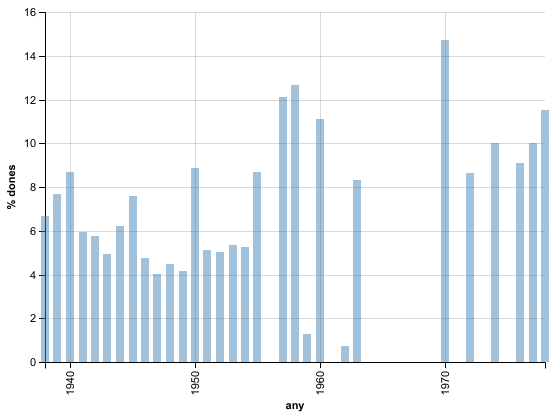

In [172]:
anys = dades.groupby(["sexe","any_inicial"])["nom"].count().unstack("sexe").reset_index()
anys["perc_dones"]=100*anys["Dona"]/(anys["Dona"]+anys["Home"])


alt.Chart(anys).mark_bar(barThinSize=8,opacity=0.5).encode(alt.X("any_inicial",
                                                                 scale=alt.Scale(),
                                            axis=alt.Axis(title="any",format="%Y")
                            ),
                       alt.Y("perc_dones",axis=alt.Axis(title="% dones"))
                      )
                        